## Objective: Put qubit in superposition and measure it.

##### important note:

|0⟩ =
[
1
0
]

|1⟩ =
[
0
1
]

#### imports

In [38]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import qiskit.tools.jupyter
from qiskit_textbook.tools import array_to_latex
from math import sqrt, pi

%qiskit_version_table

#### create qubit

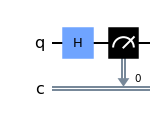

In [39]:
# Create qubit.
qubit = QuantumCircuit(1, 1)
qubit.h(0)    # Put first qubit in superposition
qubit.measure(0, 0)

# Create object.
qobj = assemble(qubit)

# Show the steps of the circuit.
qubit.draw(output='mpl')

#### check measurement probabilities through sim

In [40]:
# NOTE: We need to create a new qubit without measurement (to visualize probabilities).
qubit_2 = QuantumCircuit(1)
qubit_2.h(0)
qobj_2 = assemble(qubit_2)

sv_sim = Aer.get_backend('statevector_simulator')
state = sv_sim.run(qobj_2).result().get_statevector()

# Show result of sim.
array_to_latex(state, pretext="\\text{Probabilitiy Vector = }")

# NOTE: We find that there is a 50/50 chance of measuring |0> and |1>.

<IPython.core.display.Math object>

#### simulate the qubit measurements

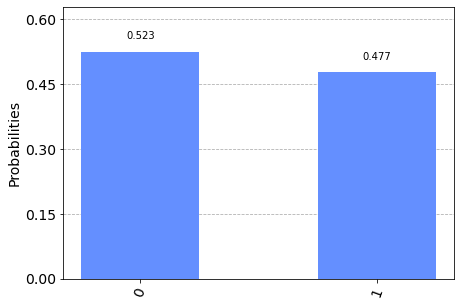

In [41]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qubit, simulator, shots=1000)    # Simulate qubit measurement 1000 times.
result = job.result()

# Show results of the simulation.
counts = result.get_counts(qubit)
plot_histogram(counts)

#### simulate the qubit measurements (on a bloch sphere)

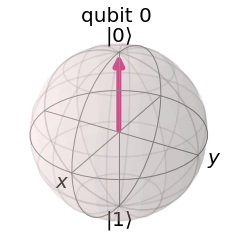

In [42]:
# Run simulation.
state = sv_sim.run(qobj).result().get_statevector()

# NOTE: The reason why a new simulator is used is bc this simulator
#       returns the statevector (final measurement) of the qubit
#       through get_statevector() while 'qasm_simulator' returns
#       get_counts(), getting measurements for a specific amounts of shots.
# Plot the state of the qubit (statevector).

plot_bloch_multivector(state)